In [ ]:
import glob
import pandas as pd
import xml.etree.ElementTree as ET

In [ ]:
def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                    int(root.find('size')[0].text),
                    int(root.find('size')[1].text),
                    member[0].text,
                    int(member[4][0].text),
                    int(member[4][1].text),
                    int(member[4][2].text),
                    int(member[4][3].text)
                    )
            xml_list.append(value)

    column_name = ['filename', 'width', 'height', 'cell_type', 'xmin', 'ymin', 'xmax', 'ymax']

    xml_df = pd.DataFrame(xml_list, columns=column_name)

    for i in range(len(xml_df['filename'])):
        if '.jpg' not in xml_df.filename[i]:
            xml_df.filename[i] = xml_df.filename[i] + '.jpg'
    return xml_df

In [ ]:
path = './BCCD-RBC-WBC-differentiation/Annotations/'

In [ ]:
df = xml_to_csv(path)

In [ ]:
df.head()

In [ ]:
new_df = pd.DataFrame()
new_df['class'] = df.cell_type
new_df = pd.get_dummies(new_df)
new_df = new_df.rename(columns={"class_Platelets": "Platelet", 
                       "class_RBC": "RBC", 
                       "class_WBC": "WBC"})
new_df.insert(0, 'confidence', 1)

**Draw Boxes on a image**

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from xml_parser import XmlParser

In [2]:
fpath = './BCCD-RBC-WBC-differentiation/Annotations/BloodImage_00410.xml'
parser_test = XmlParser()
print(parser_test.get_fname(fpath))
print(parser_test.get_width(fpath))
print(parser_test.get_height(fpath))
print(parser_test.get_labels(fpath))
print(parser_test.get_boxes(fpath))

BloodImage_00410.jpg
640.0
480.0
['RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'RBC', 'Platelets', 'Platelets', 'Platelets', 'Platelets', 'WBC']
[[233. 338. 368. 452.]
 [346. 456. 385. 476.]
 [241. 351.  73. 164.]
 [250. 366.   1.  85.]
 [106. 226. 315. 428.]
 [289. 394. 160. 244.]
 [350. 455. 109. 193.]
 [104. 209.  20. 104.]
 [  1. 108. 221. 322.]
 [582. 639. 379. 480.]
 [457. 562. 372. 456.]
 [563. 640.  20. 113.]
 [304. 400. 262. 387.]
 [239. 291. 275. 321.]
 [121. 189. 260. 320.]
 [ 57. 104. 119. 167.]
 [  1.  29. 286. 327.]
 [367. 611. 166. 394.]]


In [3]:
from target_preparation import get_parse

ann_fname = './BCCD-RBC-WBC-differentiation/Annotations/BloodImage_00410.xml'
img_fname = './BCCD-RBC-WBC-differentiation/JPEGImages/BloodImage_00410.jpg'
img = Image.open(img_fname)
img = img.resize((416, 416))
filname, labels, boxes = get_parse(ann_fname, 416)

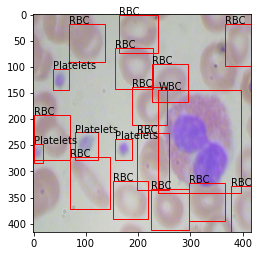

In [4]:
fig, ax = plt.subplots(1)
ax.imshow(img)
for i in range(len(boxes)):
    temp_x = boxes[i][0]
    temp_y = boxes[i][2]
    temp_width = boxes[i][1] - boxes[i][0]
    temp_height = boxes[i][3] - boxes[i][2]
    temp_rect = patches.Rectangle((temp_x, temp_y), temp_width, temp_height, 
                                  edgecolor='r', facecolor = 'none')
    
    plt.text(temp_x, temp_y, labels[i])
    ax.add_patch(temp_rect)

plt.show()

In [ ]:
new_df = pd.DataFrame()
new_df['class'] = df.cell_type
new_df = pd.get_dummies(new_df)
new_df = new_df.rename(columns={"class_Platelets": "Platelet", 
                       "class_RBC": "RBC", 
                       "class_WBC": "WBC"})
new_df.insert(0, 'confidence', 1)

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
def crop_to_WBC_Img(df, path, img_name):
    img = cv2.imread(path + img_name)
    plt.imshow(img)
    img_data = df[(df['filename'] == img_name) & (df['cell_type'] == 'WBC')]
    xmin = img_data['xmin'][0]
    xmax = img_data['xmax'][0]
    ymin = img_data['ymin'][0]
    ymax = img_data['ymax'][0]
    cropped_img = img[ymin:ymax, xmin:xmax]
    plt.imshow(cropped_img)
    return

crop_to_WBC_Img(df, './BCCD-RBC-WBC-differentiation/JPEGImages/', 'BloodImage_00000.jpg')